In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

In [2]:
# delta = w_c - w_q;       w_c = cavity freq., w_q = qubit freq. = 6GHz
# lambda = coupling rate

# Transition: |g, g, 1> --> |e, e, 0>; this happens at w_c ~= 2w_q

# H = H_q + H_c + lambda * X * sum(cos(theta) * sigmax_i + sin(theta) * sigmaz_i)
# H_q = (w_q/2 * sum(sigmaz_i))
# H_c = w_c * adag * a
# X = a + adag

In [3]:
w_q = 6e9;
lambda_ = 0.1 * w_q
theta = np.pi/6
N = 5   # Vector space of photon

w_cq = np.linspace(0.8, 2.2, 5000)
w_c = w_cq * w_q

# Photon
a = tensor(identity(2), identity(2), destroy(N))
adag = a.dag()
X = a + adag

# Atom 1
sx1 = tensor(sigmax(), identity(2), identity(N))
sz1 = tensor(sigmaz(), identity(2), identity(N))

# Atom 2
sx2 = tensor(identity(2), sigmax(), identity(N))
sz2 = tensor(identity(2), sigmaz(), identity(N))

H_q = (w_q/2) * (sz1 + sz2)   # Qubit Hamitonian
idx = 0
evals_mat = np.zeros((len(w_cq),2*2*N))

for wc in w_c:
    H_c = wc * adag * a       # Cavity Hamiltonian
    V = lambda_ * X * (np.cos(theta) * (sx1 + sx2) + np.sin(theta) * (sz1 + sz2))
    H_0 = H_q + H_c + V
    evals, ekets = H_0.eigenstates()
    evals_mat[idx, :] = evals
    idx += 1

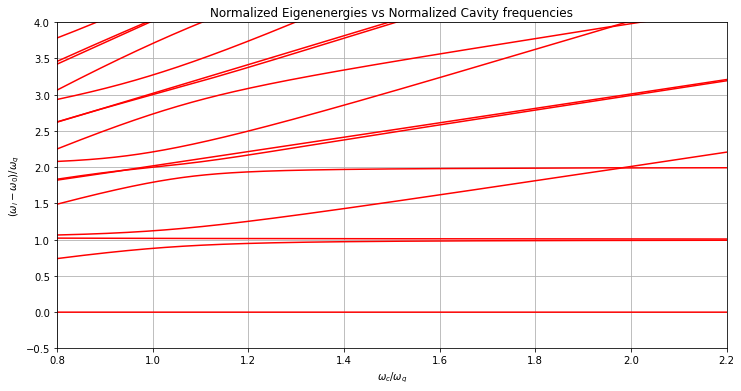

In [4]:
fig, ax = plt.subplots(figsize=(12,6))

for n in range(2*2*N):
    
    # A plot of normalized eigenenergy differences vs the normalized cavity frequencies
    
    ax.plot(w_cq, (evals_mat[:,n] - evals_mat[:,0])/w_q, 'r')
    
ax.set_xlim(0.8,2.2)
ax.set_ylim(-0.5,4)
ax.set_xlabel('$\omega_c/\omega_q$')
ax.set_ylabel('$(\omega_i - \omega_0)/\omega_q$')
ax.set_title('Normalized Eigenenergies vs Normalized Cavity frequencies')
ax.grid()

In [6]:
np.shape(evals)

(20,)

In [12]:
np.shape(w_c)

(5000,)

In [10]:
ekets[1]

Quantum object: dims = [[2, 2, 5], [1, 1, 1]], shape = (20, 1), type = ket
Qobj data =
[[-3.82955389e-03]
 [ 3.83041123e-02]
 [-1.01852500e-03]
 [ 1.75868972e-04]
 [-1.06473712e-06]
 [-7.02948647e-01]
 [ 3.73040560e-04]
 [-3.86501305e-03]
 [-7.13638650e-05]
 [-1.00466735e-05]
 [-7.02948647e-01]
 [ 3.73040560e-04]
 [-3.86501305e-03]
 [-7.13638650e-05]
 [-1.00466735e-05]
 [-1.01552920e-02]
 [ 1.00462901e-01]
 [ 4.15433288e-03]
 [ 3.35562241e-04]
 [ 1.17477919e-05]]

In [28]:
evals_mat.dtype

dtype('float64')

In [33]:
evals_mat[:,3] - evals_mat[:,0]

array([6.38692468e+09, 6.38719230e+09, 6.38746032e+09, ...,
       1.19537316e+10, 1.19537465e+10, 1.19537614e+10])

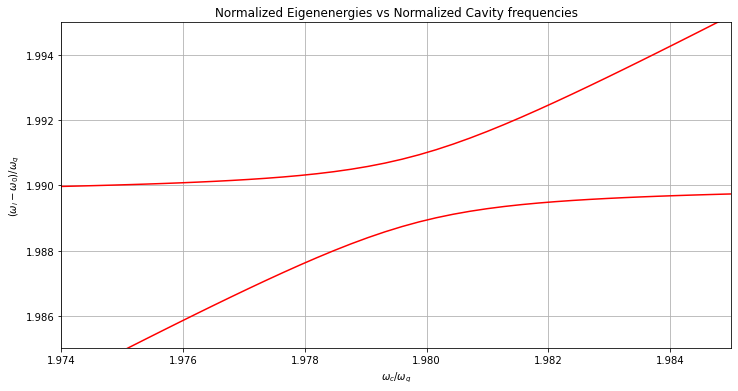

In [5]:
fig, ax = plt.subplots(figsize=(12,6))

for n in range(2*2*N):
    
    # A plot of normalized eigenenergy differences vs the normalized cavity frequencies
    
    ax.plot(w_cq, (evals_mat[:,n] - evals_mat[:,0])/w_q, 'r')
    
ax.set_xlim(1.974, 1.985)
ax.set_ylim(1.985, 1.995)
ax.set_xlabel('$\omega_c/\omega_q$')
ax.set_ylabel('$(\omega_i - \omega_0)/\omega_q$')
ax.set_title('Normalized Eigenenergies vs Normalized Cavity frequencies')
ax.grid()

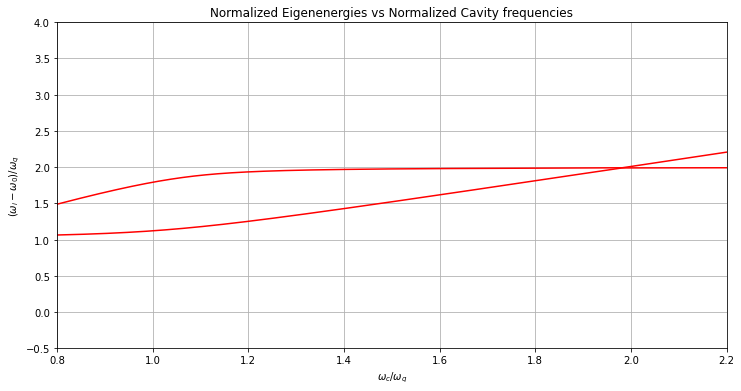

In [6]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(w_cq, (evals_mat[:,3] - evals_mat[:,0])/w_q, 'r')
ax.plot(w_cq, (evals_mat[:,4] - evals_mat[:,0])/w_q, 'r')
    
ax.set_xlim(0.8,2.2)
ax.set_ylim(-0.5,4)
ax.set_xlabel('$\omega_c/\omega_q$')
ax.set_ylabel('$(\omega_i - \omega_0)/\omega_q$')
ax.set_title('Normalized Eigenenergies vs Normalized Cavity frequencies')
ax.grid()

In [7]:
# Cavity frequency fixed at the point where splitting between |3> and |4> is minimum
# System initialized in |0> = |g,g,0>, an eigenstate of H_0
# System driven by Gaussian pulse with freq w_d = (w_4 + w_3)/2 and Kerr non-linearity

In [8]:
w_c_min_idx = np.argmin(evals_mat[:,4] - evals_mat[:, 3])
w_c_min_idx

4213

In [36]:
w_c_min

11879255851.170235

In [10]:
w_c_min = w_c[w_c_min_idx]      # Cavity frequency set at this minimum splitting
w_30 = evals_mat[w_c_min_idx, 3] - evals_mat[w_c_min_idx, 0]   # Eigenenergy of |3> at min. splitting
w_40 = evals_mat[w_c_min_idx, 4] - evals_mat[w_c_min_idx, 0]   # Eigenenergy of |4> at min. splitting 
w_43 = w_40 - w_30          # Energy difference b/w |3> and |4> at min. splitting
w_d = (w_40 + w_30)/2       # Drive frequency
tau = 1/w_43

In [11]:
H_c = w_c_min * adag * a       # Cavity Hamiltonian
V = lambda_ * X * (np.cos(theta) * (sx1 + sx2) + np.sin(theta) * (sz1 + sz2))
H_K = 0.04 * (adag ** 2) * (a ** 2)
H_0 = H_q + H_c + H_K + V
evals, ekets = H_0.eigenstates()
ekets

array([Quantum object: dims = [[2, 2, 5], [1, 1, 1]], shape = (20, 1), type = ket
       Qobj data =
       [[-2.50539307e-03]
        [-1.62580058e-04]
        [-1.19765986e-03]
        [-2.17245827e-05]
        [-3.20772414e-06]
        [ 4.38067329e-03]
        [ 2.91707355e-02]
        [ 1.26500117e-03]
        [ 1.04490484e-04]
        [ 3.71805043e-06]
        [ 4.38067329e-03]
        [ 2.91707355e-02]
        [ 1.26500117e-03]
        [ 1.04490484e-04]
        [ 3.71805043e-06]
        [-9.97818207e-01]
        [-5.09354252e-02]
        [-3.62966590e-03]
        [-1.69961315e-04]
        [-8.85141620e-06]]                                                       ,
       Quantum object: dims = [[2, 2, 5], [1, 1, 1]], shape = (20, 1), type = ket
       Qobj data =
       [[-4.10038206e-03]
        [ 4.10833708e-02]
        [-1.18953203e-03]
        [ 2.48343935e-04]
        [-1.03008087e-06]
        [-7.01109760e-01]
        [ 4.31689510e-04]
        [-5.05483654e-03]
        [-1.1

In [37]:
len(evals)

20

In [34]:
ekets[0].dag()

Quantum object: dims = [[1, 1, 1], [2, 2, 5]], shape = (1, 20), type = bra
Qobj data =
[[-2.50539307e-03 -1.62580058e-04 -1.19765986e-03 -2.17245827e-05
  -3.20772414e-06  4.38067329e-03  2.91707355e-02  1.26500117e-03
   1.04490484e-04  3.71805043e-06  4.38067329e-03  2.91707355e-02
   1.26500117e-03  1.04490484e-04  3.71805043e-06 -9.97818207e-01
  -5.09354252e-02 -3.62966590e-03 -1.69961315e-04 -8.85141620e-06]]

In [12]:
# Cavity-photon operators
X = 0

for j in range(len(evals)):
    for k in range(len(evals)):
        if k > j:
            X_jk = ekets[j].dag() * (a + adag) * ekets[k]
            X += X_jk * ekets[j] * ekets[k].dag()

Xdag = X.dag()
            

# Qubit operators

C1 = 0
C2 = 0

sp1 = tensor(sigmap(), identity(2), identity(N))
sm1 = tensor(sigmam(), identity(2), identity(N))

sp2 = tensor(identity(2), sigmap(), identity(N))
sm2 = tensor(identity(2), sigmam(), identity(N))

for j in range(len(ekets)):
    for k in range(len(ekets)):
        if k > j:
            C1_jk = ekets[j].dag() * (sm1 + sp1) * ekets[k]
            C2_jk = ekets[j].dag() * (sm2 + sp2) * ekets[k]
            C1 += C1_jk * ekets[j] * ekets[k].dag()
            C2 += C2_jk * ekets[j] * ekets[k].dag()
            
# Photon output flux
Omega_eff = 6e6
times = 2 * np.pi * np.linspace(-0.25, 1, 5000) / Omega_eff
psi_0 = tensor(basis(2), basis(2), fock(N))
options = Options(nsteps = 100000)
flux = mesolve(H_0, psi_0, times, c_ops = [Xdag*X], e_ops = [Xdag * X], options = options)

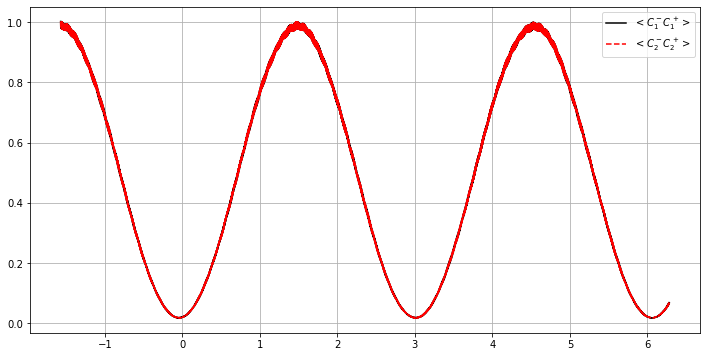

In [13]:
# Qubit excitation dynamics
C1dag = C1.dag()
C2dag = C2.dag()
Q1_exc = mesolve(H_0, psi_0, times, c_ops = [C1dag * C1], e_ops = [C1dag * C1], options = options) # For Qubit 1
Q2_exc = mesolve(H_0, psi_0, times, c_ops = [C2dag * C2], e_ops = [C2dag * C2], options = options) # For Qubit 2
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(Omega_eff * times, Q1_exc.expect[0], 'black', label = '$<C_1^-C_1^+>$')
ax.plot(Omega_eff * times, Q2_exc.expect[0], 'r--', label = '$<C_2^-C_2^+>$')
ax.legend(loc = 'upper right')
ax.grid()

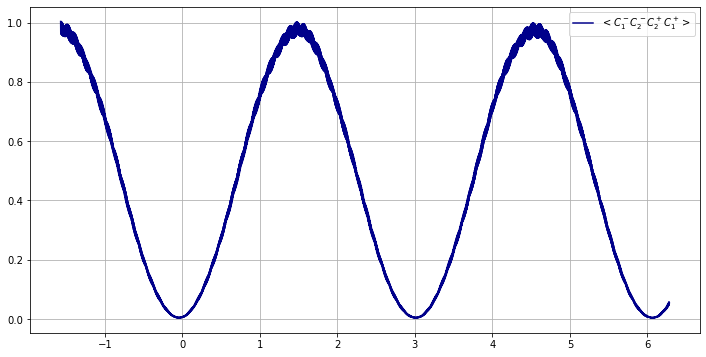

In [14]:
# 2-qubit correlation
G = mesolve(H_0, psi_0, times, c_ops = [C1dag*C2dag*C2*C1], e_ops = [C1dag*C2dag*C2*C1], options = options)
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(Omega_eff * times, G.expect[0], 'darkblue', label = '$<C_1^-C_2^-C_2^+C_1^+>$')
ax.legend(loc = 'upper right')
ax.grid()

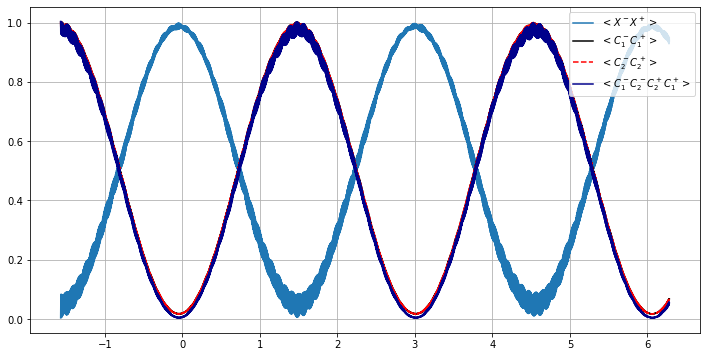

In [15]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(Omega_eff * times, flux.expect[0], label = '$<X^-X^+>$')
ax.plot(Omega_eff * times, Q1_exc.expect[0], 'black', label = '$<C_1^-C_1^+>$')
ax.plot(Omega_eff * times, Q2_exc.expect[0], 'r--', label = '$<C_2^-C_2^+>$')
ax.plot(Omega_eff * times, G.expect[0], 'darkblue', label = '$<C_1^-C_2^-C_2^+C_1^+>$')
ax.legend(loc = 'upper right')
ax.grid()

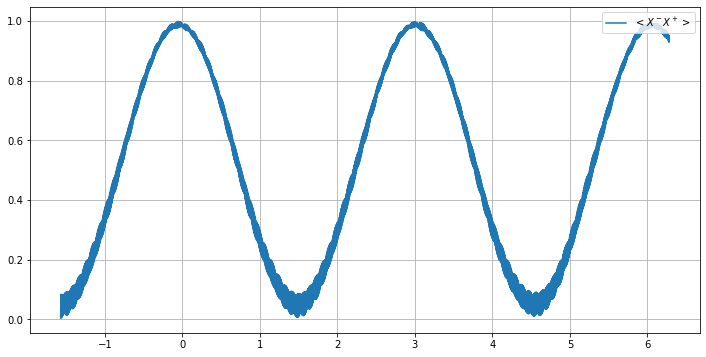

In [16]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(Omega_eff * times, flux.expect[0], label = '$<X^-X^+>$')
ax.legend(loc = 'upper right')
ax.grid()

In [33]:
def drive(t, args):
    return 5.3 * np.exp(-t*t / (2 * tau * tau)) / (tau * np.sqrt(2 * np.pi)) * np.cos(w_d * t)
    
#    return E * np.cos(args['w_d'] * t)

In [34]:
# Hamiltonian
H_c = w_c_min * adag * a       # Cavity Hamiltonian
V = lambda_ * X * (np.cos(theta) * (sx1 + sx2) + np.sin(theta) * (sz1 + sz2))
H_K = 0.04 * (adag ** 2) * (a ** 2)
H_0 = H_q + H_c + H_K + V
evals, ekets = H_0.eigenstates()

#args = {'A': 5.3, 'tau': tau, 'w_d': w_d}
H = [H_0, [(a + adag), drive]]

# Cavity-photon operators
X = 0

for j in range(len(evals)):
    for k in range(len(evals)):
        if k > j:
            X_jk = ekets[j].dag() * (a + adag) * ekets[k]
            X += X_jk * ekets[j] * ekets[k].dag()

Xdag = X.dag()

for j in range(len(ekets)):
    for k in range(len(ekets)):
        if k > j:
            C1_jk = ekets[j].dag() * (sm1 + sp1) * ekets[k]
            C2_jk = ekets[j].dag() * (sm2 + sp2) * ekets[k]
            C1 += C1_jk * ekets[j] * ekets[k].dag()
            C2 += C2_jk * ekets[j] * ekets[k].dag()
            
C1dag = C1.dag()
C2dag = C2.dag()

# Photon output flux
Omega_eff = 6e6
times = 2 * np.pi * np.linspace(-0.25, 1, 5000) / Omega_eff
psi_0 = tensor(basis(2), basis(2), fock(N))
options = Options(nsteps = 100000)
kappa = 4e-5 * w_q
gamma = 4e-5 * w_q
c_ops = [np.sqrt(kappa) * X, np.sqrt(gamma) * C1 + np.sqrt(gamma) * C2]
e_ops = [Xdag * X, C1dag * C1, C2dag * C2]
flux = mesolve(H, psi_0, times, c_ops = c_ops, e_ops = e_ops, options = options)

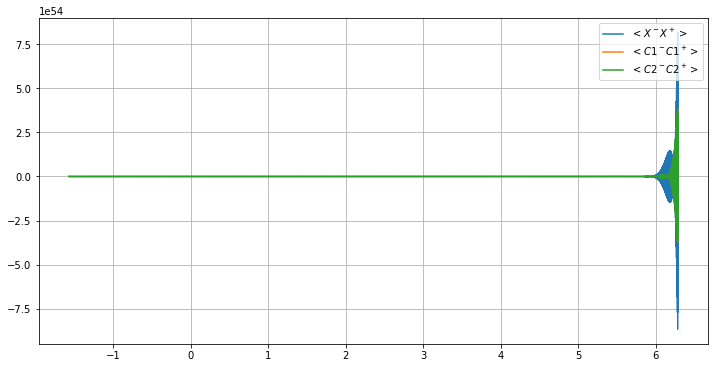

In [35]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(Omega_eff * times, flux.expect[0], label = '$<X^-X^+>$')
ax.plot(Omega_eff * times, flux.expect[1], label = '$<C1^-C1^+>$')
ax.plot(Omega_eff * times, flux.expect[2], label = '$<C2^-C2^+>$')
ax.legend(loc = 'upper right')
ax.grid()

In [41]:
fock(N)

Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]
 [0.]]

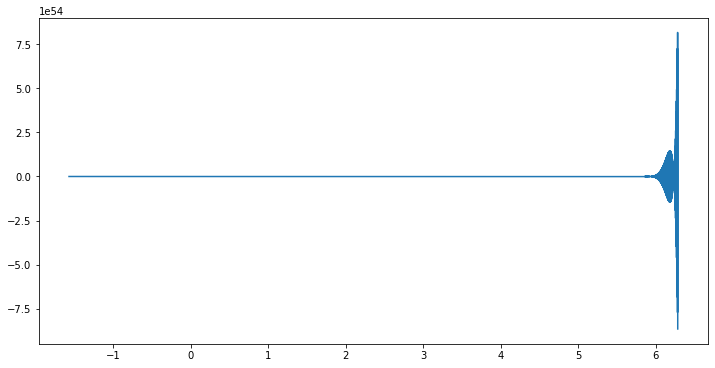

In [45]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(Omega_eff * times, flux.expect[0], label = '$<X^-X^+>$')

In [46]:
kappa

240000.00000000003

In [47]:
4e-5

4e-05